## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest


## 2. Read the raining Data

In [2]:
train = pd.read_csv(r"../data/train_set.csv")

In [3]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-06,Kolkata,Banglore,20:25:00,23:10:00,165,0.0,No Info,4804
1,Air India,2019-05-21,Delhi,Cochin,17:15:00,19:15:00,1560,2.0,No Info,11989
2,Jet Airways,2019-03-24,Kolkata,Banglore,21:10:00,16:20:00,1150,1.0,In-flight meal not included,10031
3,Indigo,2019-04-01,Delhi,Cochin,14:20:00,17:35:00,195,0.0,No Info,4729
4,Jet Airways,2019-03-15,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,No Info,8040
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,23:35:00,840,1.0,No Info,12121
6691,Jet Airways,2019-05-18,Kolkata,Banglore,09:35:00,19:10:00,575,1.0,No Info,13067
6692,Jet Airways,2019-05-24,Kolkata,Banglore,20:00:00,23:35:00,1655,1.0,In-flight meal not included,10844
6693,Multiple Carriers,2019-06-03,Delhi,Cochin,10:35:00,19:00:00,505,1.0,No Info,10877


In [4]:
# will check the data types 
# will see if they are valid or not 
# since based on types of variable will do analysis (numeric/categoric/date-time)

train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
# will convert date_of_journey, dep_time, arrival_time from object ---> datetime

train = train.assign(**{
    col: pd.to_datetime(train.loc[:,col],dayfirst=True)
    for col in ["date_of_journey","dep_time","arrival_time"]
})

In [6]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## 3. High-level Summary of Data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6695 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [8]:
# for numeric variables 
train.describe(include='number')

,duration,total_stops,price
count,6695.000000,6695.000000,6695.000000
mean,634.283794,0.801792,9019.358626
std,502.476165,0.655010,4557.219221
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5222.500000
50%,510.000000,1.000000,8151.000000
75%,925.000000,1.000000,12284.000000
max,2860.000000,4.000000,62427.000000


- in duration column by observing min max we can see in duration columns there are extreme values 
- total stops is more of a categorical variables so it doesnt make sense to consider it as a numeric variable so will consider it as categorical


In [9]:
# For Categorical Variables

#train.describe(include="O")

(
    train
    .assign(total_stops = train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,6695,6695,6695,6695.0,6695
unique,8,5,6,5.0,8
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2381,2776,2776,3643.0,5222


- in airline we have 8 uniques values, the most frequent value is jet airways and it occurs 2381 times of 6695
- so with this we can get idea of all the categorical coilumns 

## 4. High-Level analysis of Missing Values



In [10]:
eda_helper_functions.missing_info(train)


,count,percentage
variable,,


- our dataset dont have any missing values hence its empty

In [11]:
#eda_helper_functions.plot_missing_info(train)

In [12]:
# matrix method for finding missing values
#!pip install missingno --quiet

## 5. High-Level analysis of outliers


- will use IsolationForest
- in our dataset will create a seperate column that will indicate it is outlier or not

In [13]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [14]:
(
    train
    .assign(outlier=forest.fit_predict(train
                                      .drop(columns="price")
                                      .select_dtypes(include="number")))
    .query("outlier == -1")
    #.duration
    #.describe()
)

# we are making a new feature called outlier
# we are using a isolation forest algorithm on training data
# then will drop price column
# will just use input numeric feature
# reults we can see the last columns are 1 or -1
# now we want the values which are outlier for which will use query method to filter our dataframe     


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Air India,2019-05-21,Delhi,Cochin,2024-07-08 17:15:00,2024-07-08 19:15:00,1560,2.0,No Info,11989,-1
2,Jet Airways,2019-03-24,Kolkata,Banglore,2024-07-08 21:10:00,2024-07-08 16:20:00,1150,1.0,In-flight meal not included,10031,-1
3,Indigo,2019-04-01,Delhi,Cochin,2024-07-08 14:20:00,2024-07-08 17:35:00,195,0.0,No Info,4729,-1
4,Jet Airways,2019-03-15,Mumbai,Hyderabad,2024-07-08 10:20:00,2024-07-08 11:50:00,90,0.0,No Info,8040,-1
7,Spicejet,2019-05-18,Kolkata,Banglore,2024-07-08 15:05:00,2024-07-08 20:20:00,315,1.0,No Info,4963,-1
...,...,...,...,...,...,...,...,...,...,...,...
6685,Jet Airways,2019-03-15,Mumbai,Hyderabad,2024-07-08 10:20:00,2024-07-08 11:50:00,90,0.0,In-flight meal not included,4160,-1
6686,Indigo,2019-05-03,Chennai,Kolkata,2024-07-08 22:05:00,2024-07-08 00:25:00,140,0.0,No Info,5277,-1
6687,Indigo,2019-03-03,Mumbai,Hyderabad,2024-07-08 20:05:00,2024-07-08 21:35:00,90,0.0,No Info,5232,-1
6688,Jet Airways,2019-06-24,Delhi,Cochin,2024-07-08 19:15:00,2024-07-08 19:00:00,1425,1.0,In-flight meal not included,10262,-1


## 6. Pair Plots

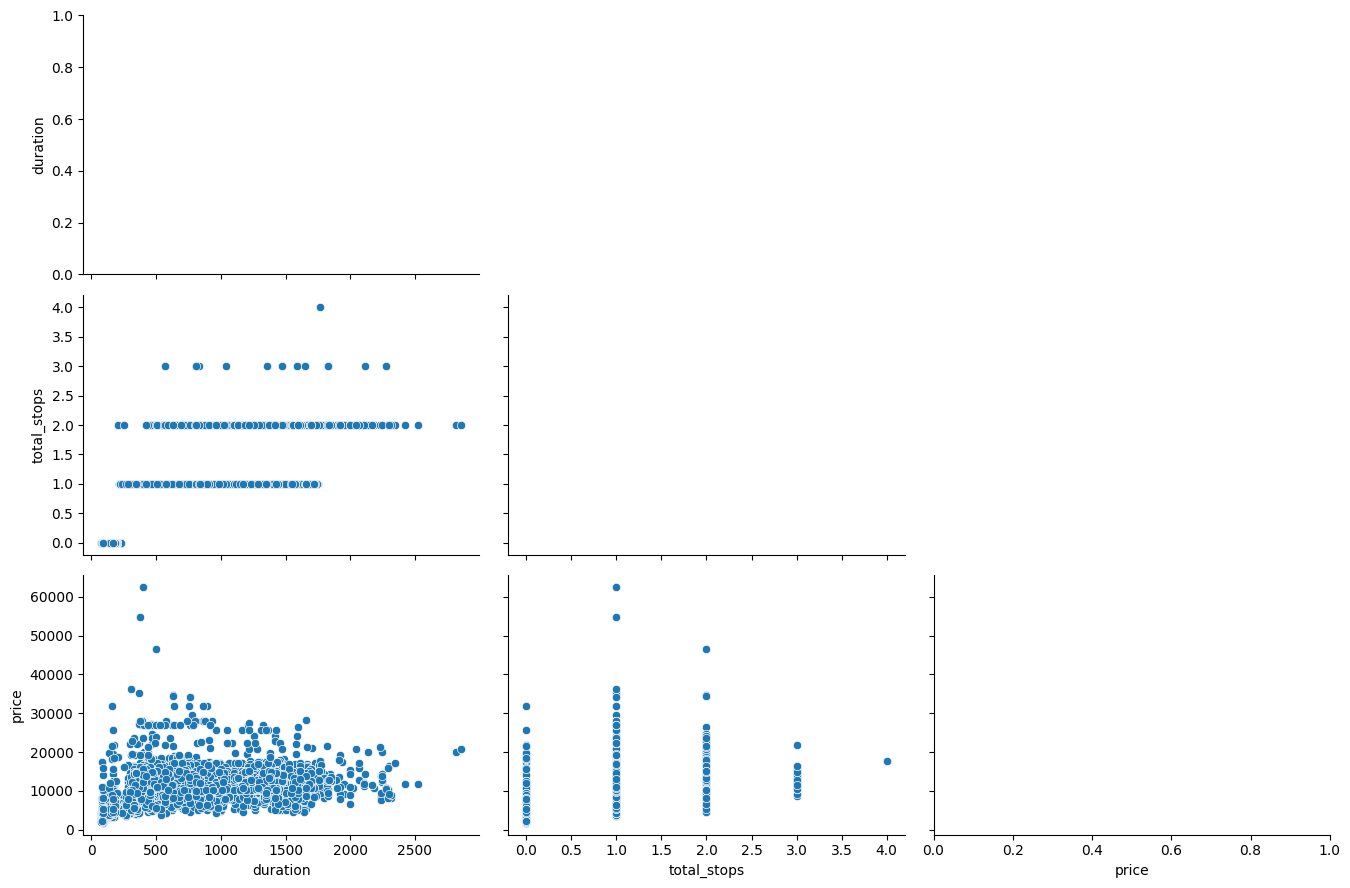

In [15]:
# Pair Plots will give us good understanding of our numeric variables

eda_helper_functions.pair_plots(train)

- **pair plot is a symmetric graph so to avoid the repeated information they are just showing the lower half (in code for this we kept corner = True)**
- numeric variable we had was total stop, duration and price
- so for each combination it made a pair plot
- we can see a linear relationship between price and duration longer the flights higher the price  
- if we see duration vs total stops we can see if total stops are 0 the duration is very small


## 7. Correlation Analysis 

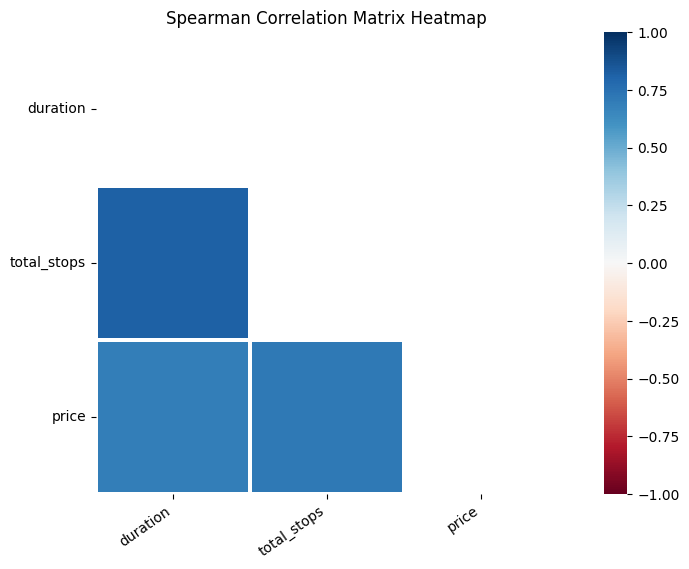

In [16]:
# Multicollinearity is not a good idea 
# hence its imp to understand correlation

eda_helper_functions.correlation_heatmap(train)

In [17]:
train.corr(method="spearman", numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.820204,0.693770
total_stops,0.820204,1.000000,0.715038
price,0.693770,0.715038,1.000000


- same thing here also pair wise numeric feature hiding the upper half and showing only the lower half since same info is convey in top half as well
- plot shows high correlation between price vs duration, price vs total_stops
- as duration increases price increases, as stops increases the price also increases
- but if we see the pair plots in which total stop vs price we can see for 0 stops largest price is somewhere arounf 30k but for stop 1 and 2 its much more  so because of this extreme values the correlation value may have got influenced by that
- so just looking at correlation map we can ssume that total stops vs price are highly correlated but if we see the pair plot there are some data points in stop 2 and 3 which has extreme value due to which the correlation value got influenced


In [18]:
# train= (
#     train
#     .assign(total_stops = train["total_stops"].astype(object))
#     #.describe(include="O")
# )

D:\SAURABH\ANACONDA\ANACONDA\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


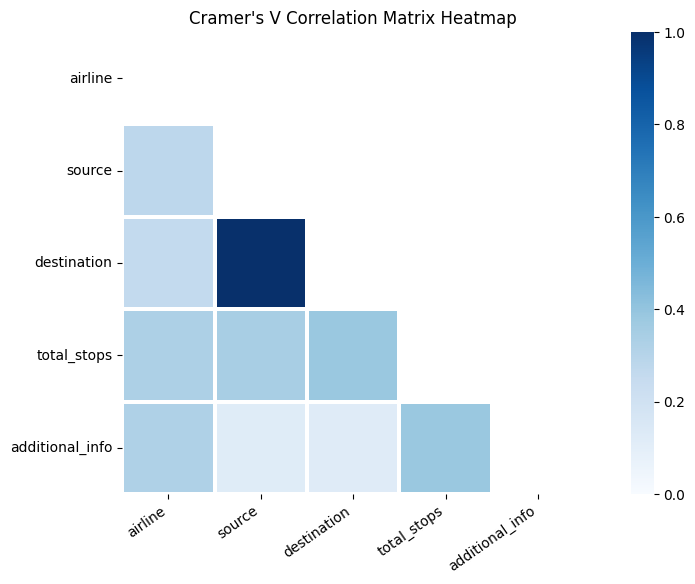

In [19]:
# will see correlation for categorical features

# eda_helper_functions.cramersV_heatmap(train)

(
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .pipe(eda_helper_functions.cramersV_heatmap)
)


 ## 8. Detailed Analysis

In [20]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 Airline

In [21]:
train.airline


0                  Indigo
1               Air India
2             Jet Airways
3                  Indigo
4             Jet Airways
              ...        
6690          Jet Airways
6691          Jet Airways
6692          Jet Airways
6693    Multiple Carriers
6694            Air India
Name: airline, Length: 6695, dtype: object

- its a categorical feature
- we have a function for that will use it to get summary

In [22]:
eda_helper_functions.cat_summary(train,"airline")


# Categories Distribution: we are combining below 2 methods
#train.airline.value_counts()
#train.airline.value_counts(normalize = True)

0                  Indigo
1               Air India
2             Jet Airways
3                  Indigo
4             Jet Airways
              ...        
6690          Jet Airways
6691          Jet Airways
6692          Jet Airways
6693    Multiple Carriers
6694            Air India
Name: airline, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,8
top,Jet Airways
freq,2381


,count,percentage
category,,
Jet Airways,2381,0.355639
Indigo,1275,0.190441
Air India,1100,0.164302
Multiple Carriers,747,0.111576
Spicejet,534,0.079761
Vistara,307,0.045855
Air Asia,219,0.032711
Goair,132,0.019716


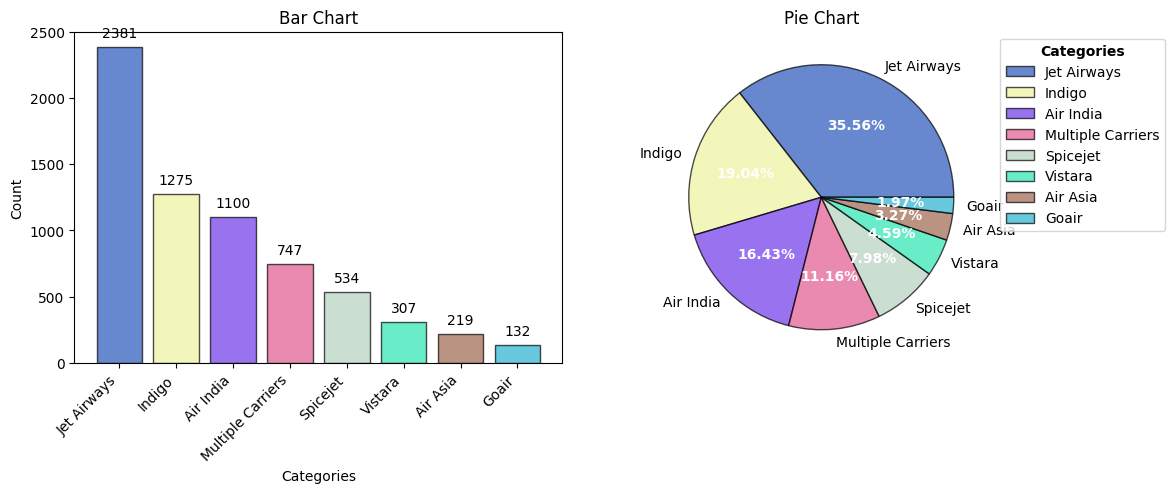

In [23]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False) #, k=3)

- On the left, we can see a simple bar chart (count plot).
- On the right, we have the same information presented as a pie chart.
- At the bottom, we have a word cloud. It represents the category, and the size of each word corresponds to its frequency.
- word cloud would helps us in case where we have highly cardinal feature, if we have text data then we can learn which word has occured frequently or if we have high cardinality column then we can see which value occurs more frequently

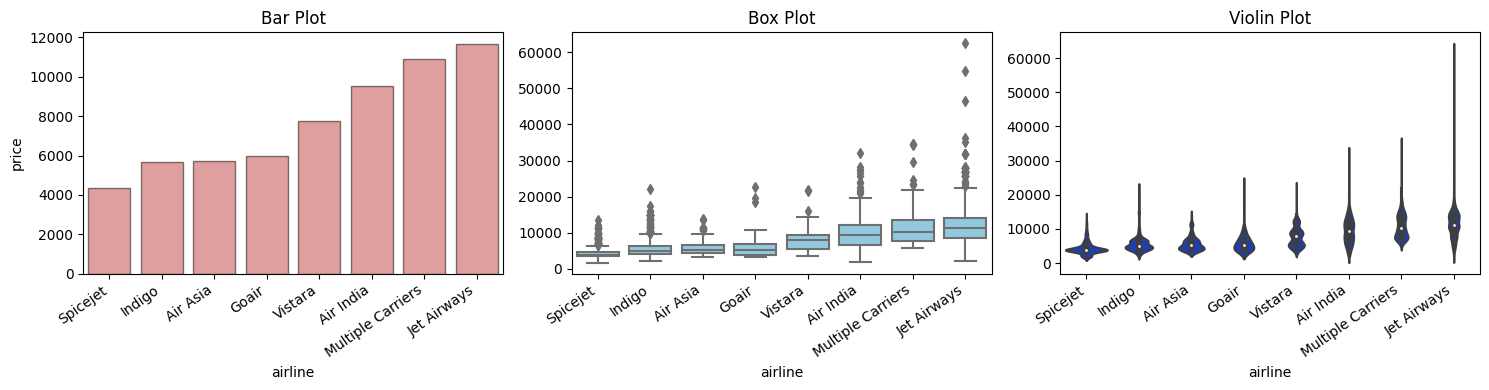

In [24]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

**Bar Plot**

- The bar plot shows that for SpiceJet, the average price is around 4000.
- For Indigo, the average price is around 6000, and similarly for other categories.
- From the bar plot, we can clearly see that each airline has a different average price, displaying an increasing trend. Therefore, we can conclude that the airline is a good feature for predicting prices as prices vary based on the airline.

**Box Plot**

- In the bar plot, we get the mean of each category.
- In the box plot, we can see the distribution of values for each category.
- The box plot shows the 25th percentile, median, 75th percentile, and the extreme ends.
- For Jet Airways, the diamonds in the box plot indicate potential outliers. These may or may not be true outliers, but they are potential outliers that need to be analyzed further.
- Observing the box for Jet Airways, the box represents the interquartile range (IQR) from the 25th percentile (Q1) to the 75th percentile (Q3), which means 50% of the observations fall within the range of 10000 to 15000. Anything above this range is considered a potential outlier. There are points for Jet Airways with prices around 40000, 50000, and 60000, indicating potential outliers.

**Violin Plot**

- The violin plot combines KDE (Kernel Density Estimation) plot and box plot.
- The box plot helps to show extreme values.
- The violin plot helps to analyze the shape of the distribution to determine if the values are skewed to the left, right, or symmetric.
- For SpiceJet, the distribution looks almost normal but is right-skewed, indicating that the majority of flights are cheap, with very few extreme values, causing the skewness towards the right.
- For each airline category, the shape of the distribution is completely different, suggesting that the airline is a good predictor of price.

These observations suggest that the airline feature significantly impacts flight prices and is a valuable predictor in the analysis.


In the above graphs, we observed a relationship between airline and prices. To confirm this relationship, we will perform hypothesis testing.


In [25]:
eda_helper_functions.num_cat_hyp_testing(train, "price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 536.6699869010923
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3021.9813851681556
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


### Report Observations

- We are performing two tests: ANOVA and Kruskal-Wallis.

**What is the ANOVA test?**
- Given our categorical feature (airline), for each category, it calculates the mean value of the price. It then compares these means.
- If there is a significant difference between the means, it indicates a good association between the variables. If there is no difference between the means, it indicates no valid association. This is what the ANOVA test does.

**What is the Kruskal-Wallis test?**
- It calculates the median value and tests the hypothesis based on the median values.
- We use both tests to ensure clarity; if both tests give the same conclusion, it reinforces the results.

**ANOVA Test Result**: At a 5% significance level for our training data, we have enough evidence to conclude that the means of the categories are different. Therefore, we reject the null hypothesis and conclude that price and airline are associated with each other.


### Multivariate Analysis with seaborn.FacetGrid

For multivariate analysis, we use `seaborn.FacetGrid`. Seaborn has this function called `FacetGrid` which is very helpful for multivariate analysis.

- We have airline and prices, so in bivariate analysis, we created bar charts to show the relationship between these two variables.
- Using `FacetGrid`, we can enhance these bar charts to show the relationship between price, airline, and destination.
- This allows us to visualize how the price varies not only with the airline but also with the destination.


In [26]:
def plot_facet_grid(data, col_name, col_wrap=3, height=4, aspect=1.2):
    airline_grid = sns.FacetGrid(
        data=data,
        col_wrap=col_wrap,
        col=col_name,
        height=height,
        aspect=aspect,
        sharey=True
    )
    
    airline_grid.map(sns.barplot, "airline", "price", order=data.airline.unique())
    
    for ax in airline_grid.axes[3:]:
        eda_helper_functions.rotate_xlabels(ax)
    
    return airline_grid

# #airline_grid.axes[3:] 
# for ax in airline_grid.axes[3:]:
#     eda_helper_functions.rotate_xlabels(ax)

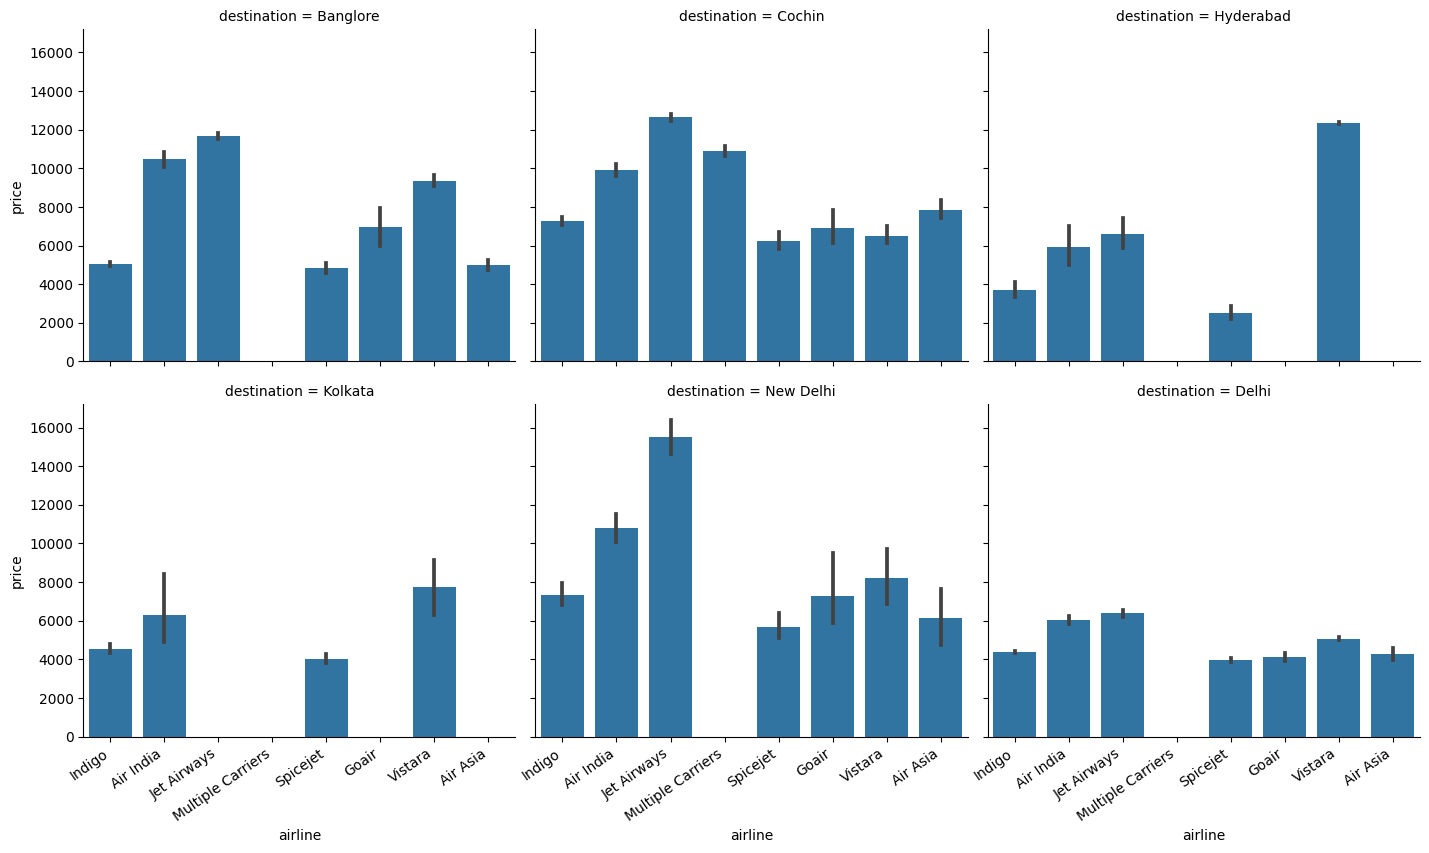

In [27]:
# Plot by destination
plot_facet_grid(train, "destination")

### Explanation
- **Grid of 6 Axes**: The grid is composed of 6 axes because the "destination" column has 6 unique values.
- **Col_wrap=3**: Setting `col_wrap=3` ensures that there are 3 plots in each row, preventing the grid from appearing cluttered.
- **Relationship Between Airline and Price**: In each axis (plot), we want to visualize the relationship between "airline" and "price".
- **Mapping the Barplot**: We use `airline_grid.map` to map a barplot onto this figure, showing the relationship between "airline" and "price" for each destination.
- **Order Parameter**: By specifying `order=train.airline.unique()`, we ensure that all airlines are displayed in each plot, even if they don't operate in certain destinations. Without this, bars for airlines that don't operate in specific destinations wouldn't be shown.

**will do same for source column**


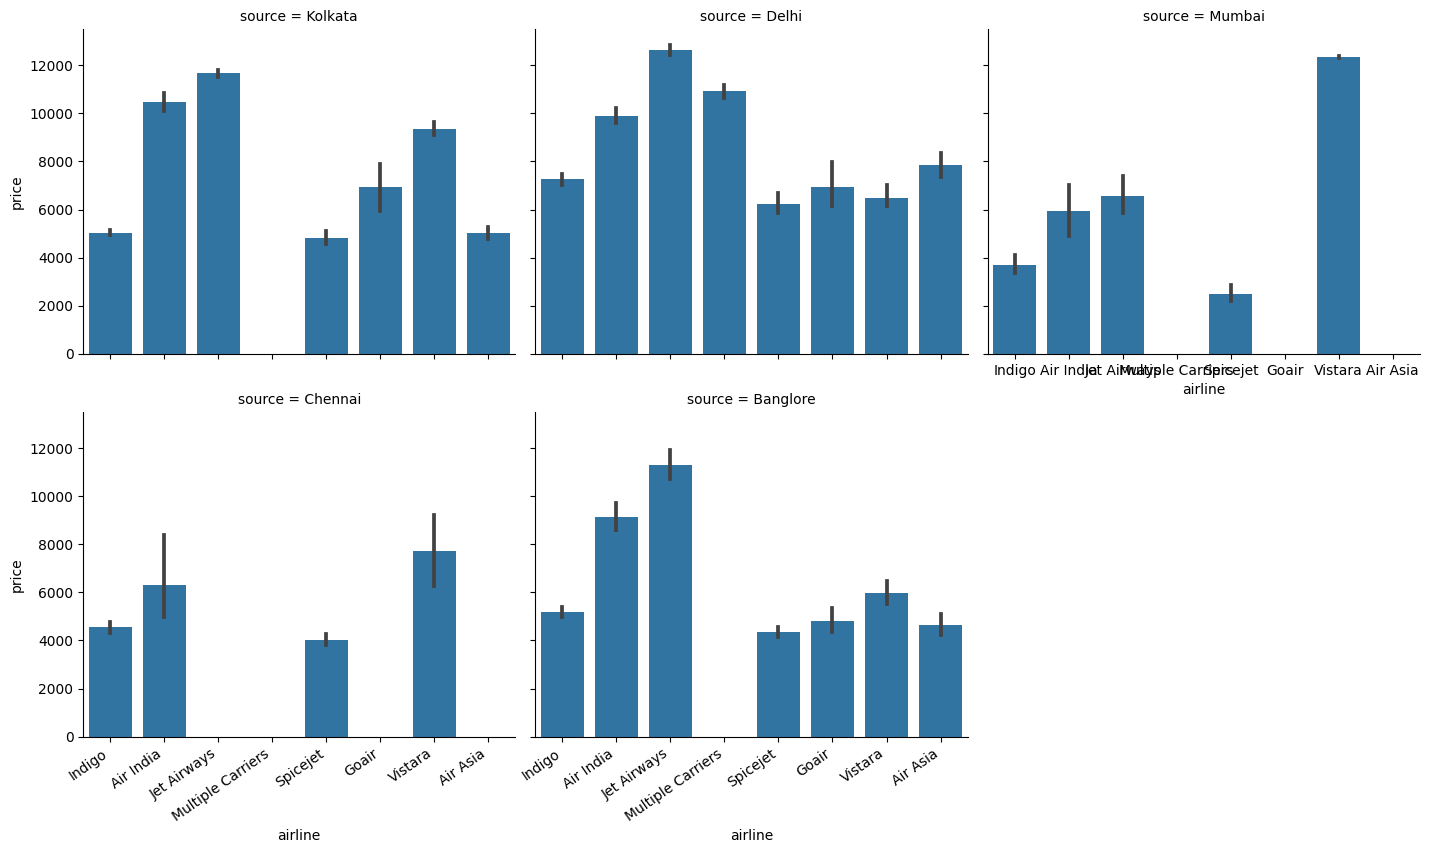

In [28]:
plot_facet_grid(train, "source")


### 8.2 date_of_journey

In [29]:
train.date_of_journey


0      2019-06-06
1      2019-05-21
2      2019-03-24
3      2019-04-01
4      2019-03-15
          ...    
6690   2019-05-09
6691   2019-05-18
6692   2019-05-24
6693   2019-06-03
6694   2019-06-15
Name: date_of_journey, Length: 6695, dtype: datetime64[ns]

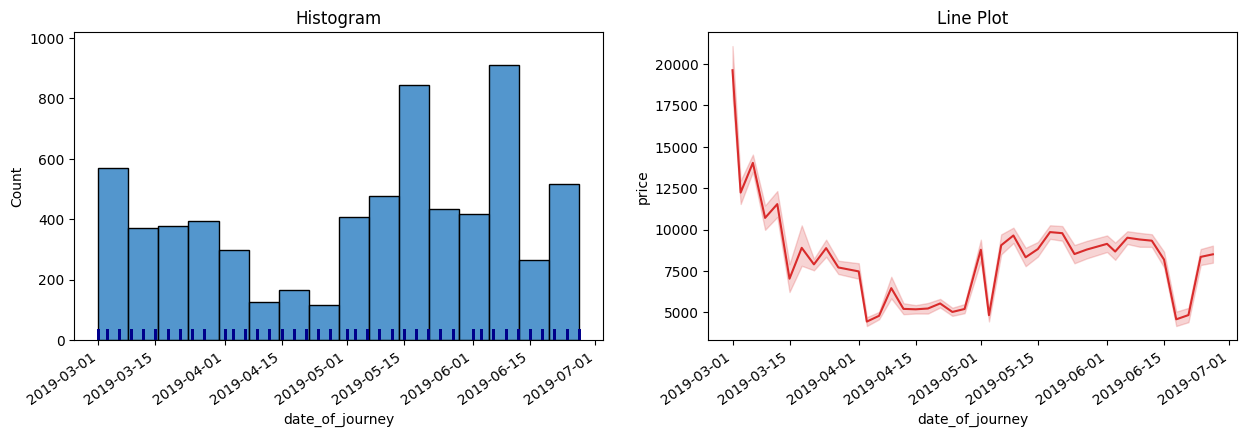

In [30]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

### Observation
- **Histogram**: 
    - The histogram shows the number of flights in each date range.
    - The first bar represents flights from March 1st to March 15th.
    - It provides the count of flights within each specific date range.
    - A trend is visible: in March, the number of flights is decreasing, in April, there are very few flights, and in May, the number of flights increases.
    - May and June are summer months, which might explain the higher number of flights during these months.

- **Line Plot**:
    - On the x-axis, we have the date range, and on the y-axis, we have the average price.
    - From March to April, the average prices are decreasing until May.
    - From May to June, the prices start increasing again.
    - This analysis gives a basic understanding of flight trends and prices over the date ranges.


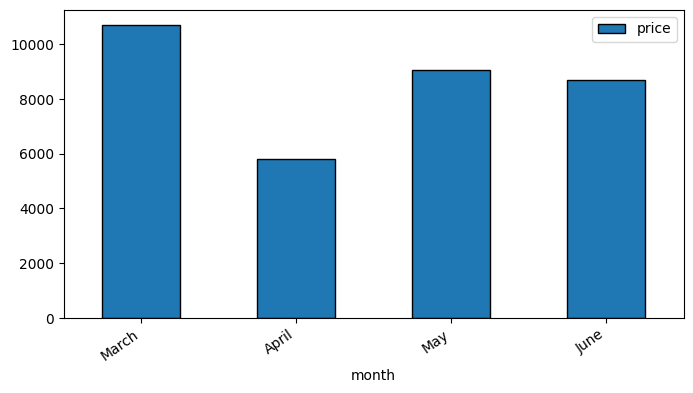

In [31]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8, 4),
        edgecolor="black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

- **March**: The average price is high.
- **April**: The average price decreases.
- **May**: The average price increases.
- **June**: The average price decreases again.

This indicates that the date of the journey is a good feature to predict the prices.

We will now perform the same analysis on a weekly basis.


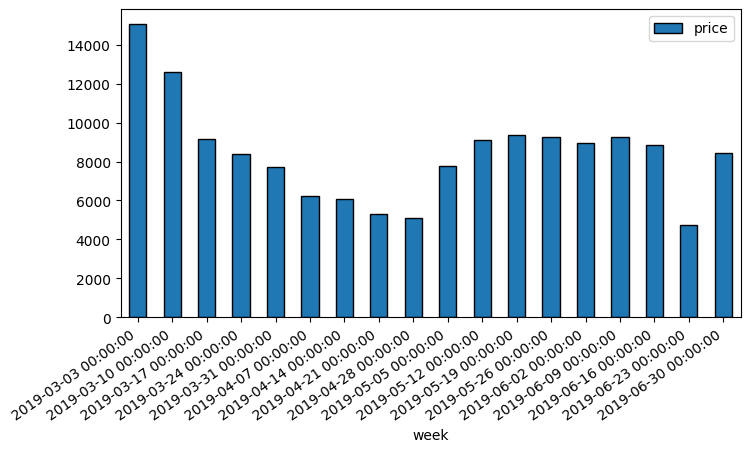

In [32]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="W"))
    .price.mean()
    .to_frame()
    .rename_axis(index="week")
    .plot(
        kind="bar",
        figsize=(8, 4),
        edgecolor="black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

- **Weekly Analysis**: Even on a weekly basis, we can observe that the trend is changing.
- So above, we did bivariate analysis.
- Now, we will do multivariate analysis.
- We will try to analyze the average price within each month depending on the source, i.e., where you want to fly from.


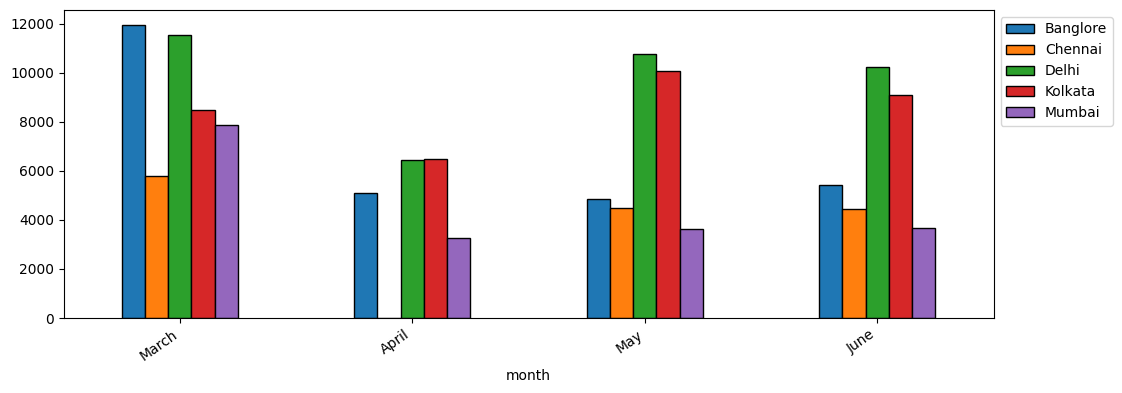

In [33]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(12, 4),
        edgecolor="black"
    )
)

ax = plt.gca()

ax.legend(
    loc="upper left",
    bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

- This is our multivariate graph.
- For each month and for each source, it shows the average flight price.


### 8.3 dep_time

In [34]:
train.dep_time


0      2024-07-08 20:25:00
1      2024-07-08 17:15:00
2      2024-07-08 21:10:00
3      2024-07-08 14:20:00
4      2024-07-08 10:20:00
               ...        
6690   2024-07-08 09:35:00
6691   2024-07-08 09:35:00
6692   2024-07-08 20:00:00
6693   2024-07-08 10:35:00
6694   2024-07-08 05:10:00
Name: dep_time, Length: 6695, dtype: datetime64[ns]

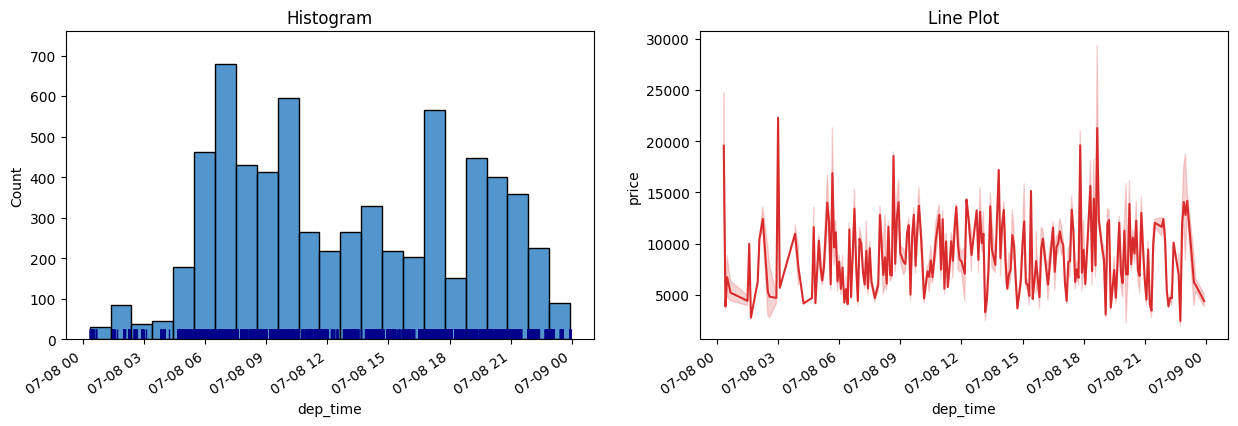

In [35]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")


- We can observe that the morning has the maximum number of flights.
- In the afternoon, there are fewer flights compared to the evening and night.


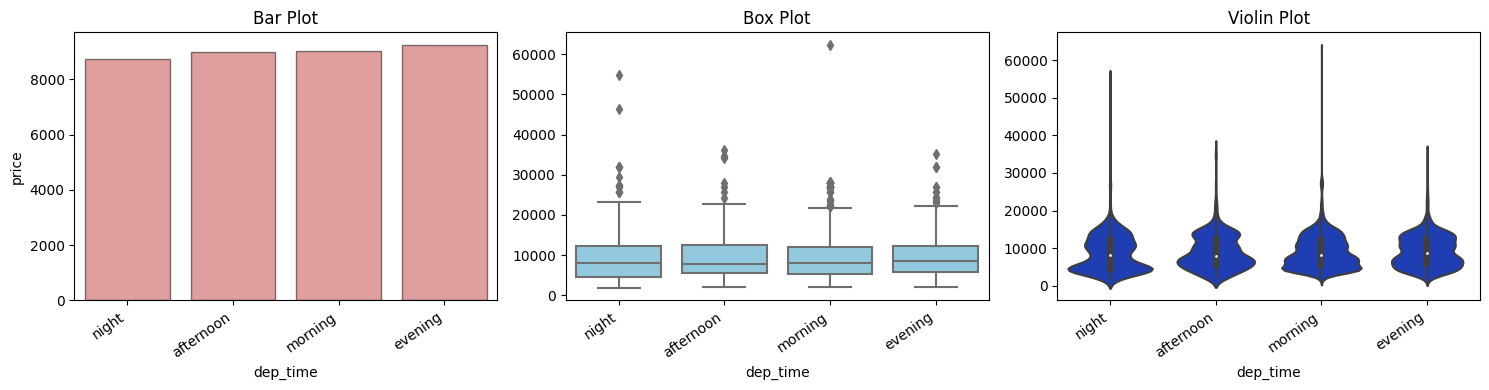

In [36]:
(
    train
    .assign(dep_time=lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
                   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
                   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
                   ["morning", "afternoon", "evening"],
                   default="night")
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

- We can observe an increasing trend in the average price of airlines across different parts of the day.


### 8.4 duration


In [37]:
train.duration


0        165
1       1560
2       1150
3        195
4         90
        ... 
6690     840
6691     575
6692    1655
6693     505
6694     170
Name: duration, Length: 6695, dtype: int64

In [38]:
eda_helper_functions.num_summary(train, "duration")


0        165
1       1560
2       1150
3        195
4         90
        ... 
6690     840
6691     575
6692    1655
6693     505
6694     170
Name: duration, Length: 6695, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,510.0
75,925.0
90,1440.0
95,1600.0
99,1845.6


,value
mean,634.283794
trimmed mean (5%),601.100050
trimmed mean (10%),572.517267
median,510.000000


,value
var,252482.296204
std,502.476165
IQR,755.000000
mad,340.000000
coef_variance,0.792195


,value
skewness,0.884712
kurtosis,-0.105064


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.886802077293396
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 249.15245559976756
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


- **Quick Glance**: The "duration" column shows various flight durations ranging from 165 minutes to 2860 minutes across 6695 records in our dataset.
- **Meta-data**: The data type is int64 with no missing values.
- **Percentiles**: The percentile analysis reveals insightful details about the data distribution. For instance, the shortest flight duration in our dataset is 75 minutes (0th percentile), and 10% of flights are less than 145 minutes in duration. The median (50th percentile) indicates that half of the flights are shorter than 510 minutes, which translates to less than 8.5 hours.
- **Central Tendency**: The average flight duration is 634 minutes. Trimmed mean calculations (excluding 5% and 10% outliers) adjust the mean to mitigate the influence of extreme values, aligning it closer to the median (510 minutes), which suggests right skewness due to higher values.
- **Measures of Spread**: Variance (252,482) is the square of the standard deviation (502 minutes), indicating that flight durations typically vary around 502 minutes from the mean. The Interquartile Range (IQR) of 755 minutes and Median Absolute Deviation (MAD) of 340 minutes are used to measure spread, both less sensitive to outliers compared to variance and standard deviation.
- **Skewness and Kurtosis**: The skewness of 0.88 indicates positive skewness, suggesting that the distribution is skewed towards longer flight durations. Kurtosis of -0.3, close to zero but negative, implies a flatter peak and thinner tails compared to a normal distribution.
- **Hypothesis Testing for Normality**: Both the Shapiro-Wilk and Anderson-Darling tests confirm that the data sample is not normally distributed (p < 0.05). This conclusion aligns with observations from skewness, kurtosis, and the significant difference between mean and median values.


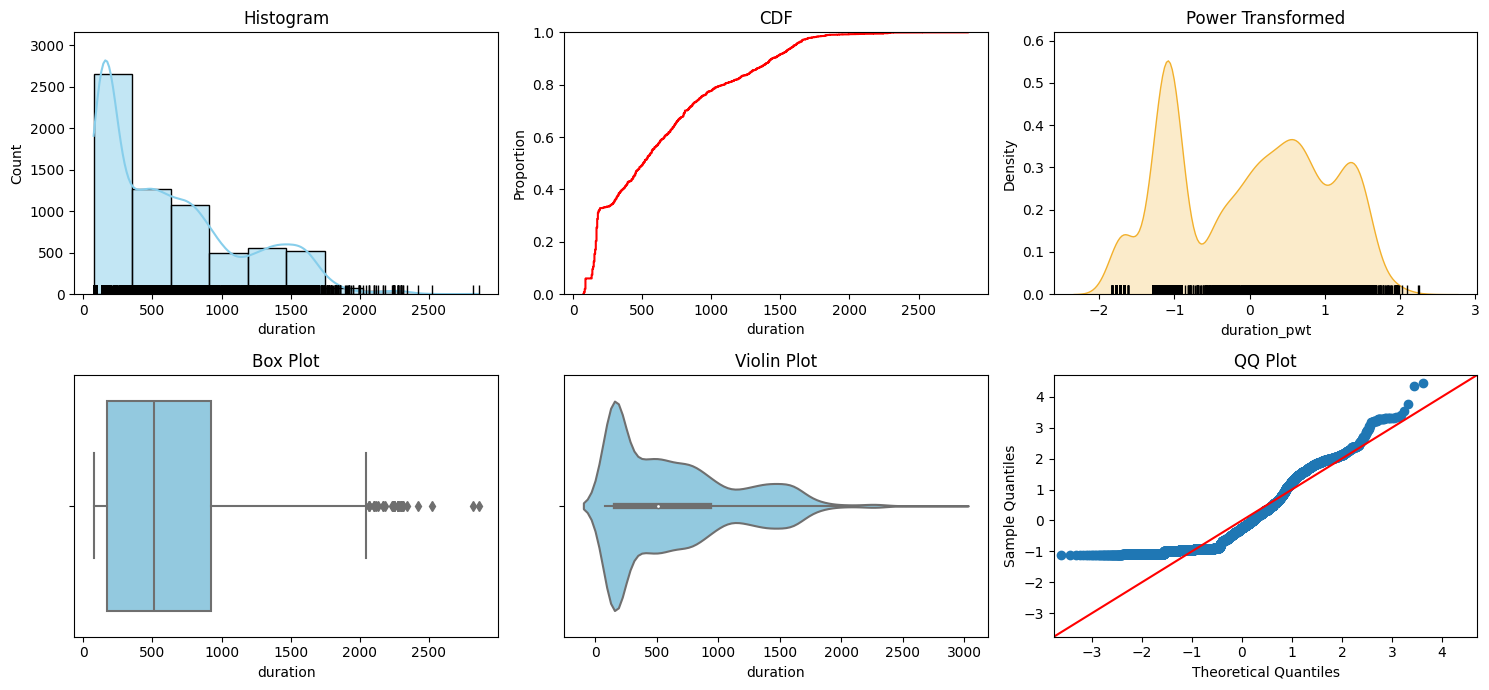

In [39]:
eda_helper_functions.num_univar_plots(train, "duration")


### Univariate Analysis of Duration

- **Histogram**: The histogram displays the distribution of flight durations in various ranges. The tallest bars are concentrated towards shorter durations, indicating that a majority of flights have shorter durations. The rug plot alongside shows outliers, revealing two flights with durations above 2500 minutes.

- **CDF (Cumulative Distribution Function)**: The CDF provides cumulative probabilities across different flight durations. For example, a point at 0.8 on the y-axis signifies that 80% of flights have durations less than 1000 minutes. It offers a holistic view of how flight durations are distributed across the dataset.

- **Power Transformed Plot**: This plot shows the power transformation applied to the duration feature to achieve symmetry. While it doesn't normalize the feature, it attempts to make its distribution as symmetric as possible using a transformation formula involving lambda. 

- **QQ Plot (Quantile-Quantile Plot)**: The QQ plot compares the quantiles of our variable (duration) against a theoretical distribution (in this case, normal distribution). If the points align perfectly on a straight line, it suggests that the variable follows the theoretical distribution. However, deviations from the line indicate departures from normality. In this case, the points do not fall on a straight line, indicating that the duration feature is not normally distributed.

- **Summary**: Through numerical analysis, hypothesis testing, and graphical representations (histogram, CDF, power transformation, QQ plot), we observed that the duration feature is positively skewed, with most flights having shorter durations, and it deviates significantly from a normal distribution.


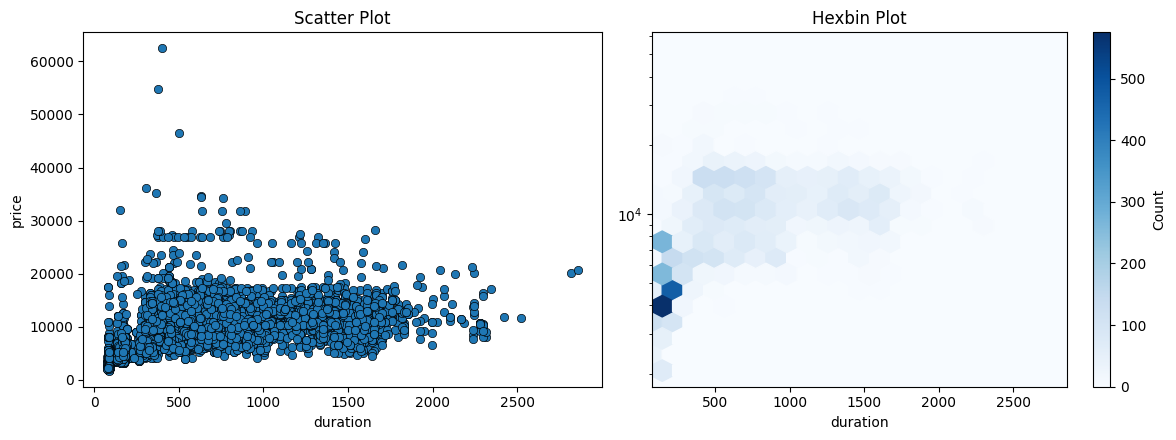

In [40]:
eda_helper_functions.num_bivar_plots(
    train,
    "duration",
    "price",
    hexbin_kwargs=dict(
        yscale="log",
        gridsize=20,
        cmap="Blues"
    )
)

### Observations for Hexbin Plot of Duration vs Price

- **Scatter Plot**: On the left side, we have a simple scatter plot showing the relationship between duration and price.

- **Hexbin Plot**: On the right side, we have a hexbin plot. The hexbin keyword arguments in the code form a dictionary.

  - **yscale="log"**: This applies a log scale to the y-axis.
  - **gridsize=20**: This sets the grid size for the hexagonal bins.
  - **cmap="Blues"**: This specifies the color map used, in this case, "Blues".

- **Hexbin Plot Explanation**: The hexbin plot breaks down the numeric values into bins of different ranges. Each hexagon represents a bin, and the number of observations within that bin is represented by the color intensity.

  - **Log Scale**: The y-axis is scaled logarithmically for better clarity.

  - **Data Distribution**: The scatter plot displays individual data points for duration vs price, whereas the hexbin plot groups these points into hexagonal bins.

  - **Color Intensity**: Darker hexagons indicate a higher number of observations in that bin.

  - **Key Observation**: In the hexbin plot, we observe that from 0 to approximately 300 minutes of duration and up to around 5000 in price, the bins are very dark. This indicates that there are a maximum number of flights within this duration and price range.

This hexbin plot effectively shows the density of flights in various duration and price ranges, with darker colors indicating higher densities.

- Will now do hypothesis testing

In [41]:
eda_helper_functions.num_num_hyp_testing(train, "duration","price")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5130980390145419
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6937704029992191
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


### Observation

We performed two tests: Pearson Test and Spearman Test.

- **Pearson Test**: Calculates the Pearson correlation, which measures the linear relationship between two variables.
  
- **Spearman Test**: Calculates the Spearman correlation, which measures the monotonic relationship between two variables.

- **Correlation Analysis**: Both tests confirm that price and duration are correlated.

- **Heatmap Consistency**: This result is consistent with the heatmap, which also showed a correlation between duration and price with values around 0.7.


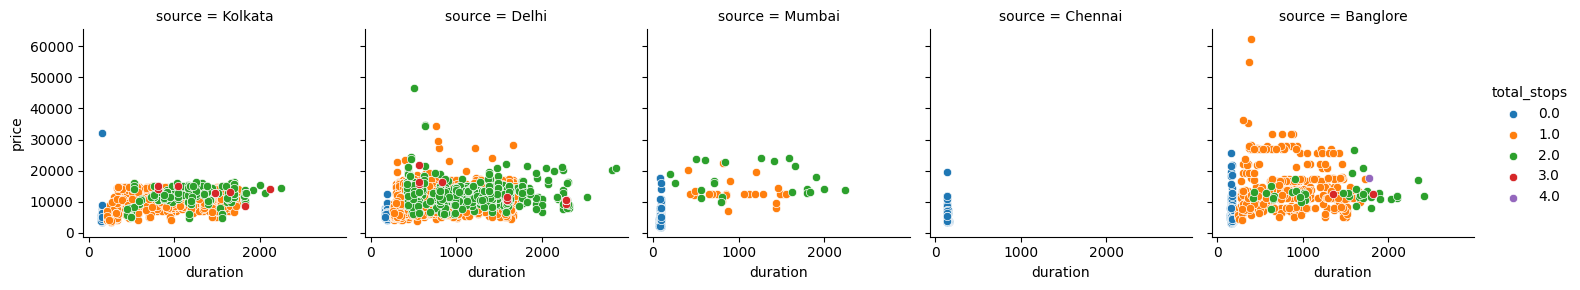

In [42]:
# Multivariate Analysis
# What kind of multivariate analysis do we want to do? 
# The first thing is obvious: we need a duration vs price scatter plot.
# What more can we do? We can see how duration and price are varying for each source.
# For each unique source, we want to see how long the flights are and how the prices vary.

duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    hue="total_stops",
    sharey=True  # We are comparing duration vs price for every combination of categories, so we want to make sure that the y-axis is constant for every plot.
)

duration_grid.map(sns.scatterplot, "duration", "price") 
duration_grid.add_legend()


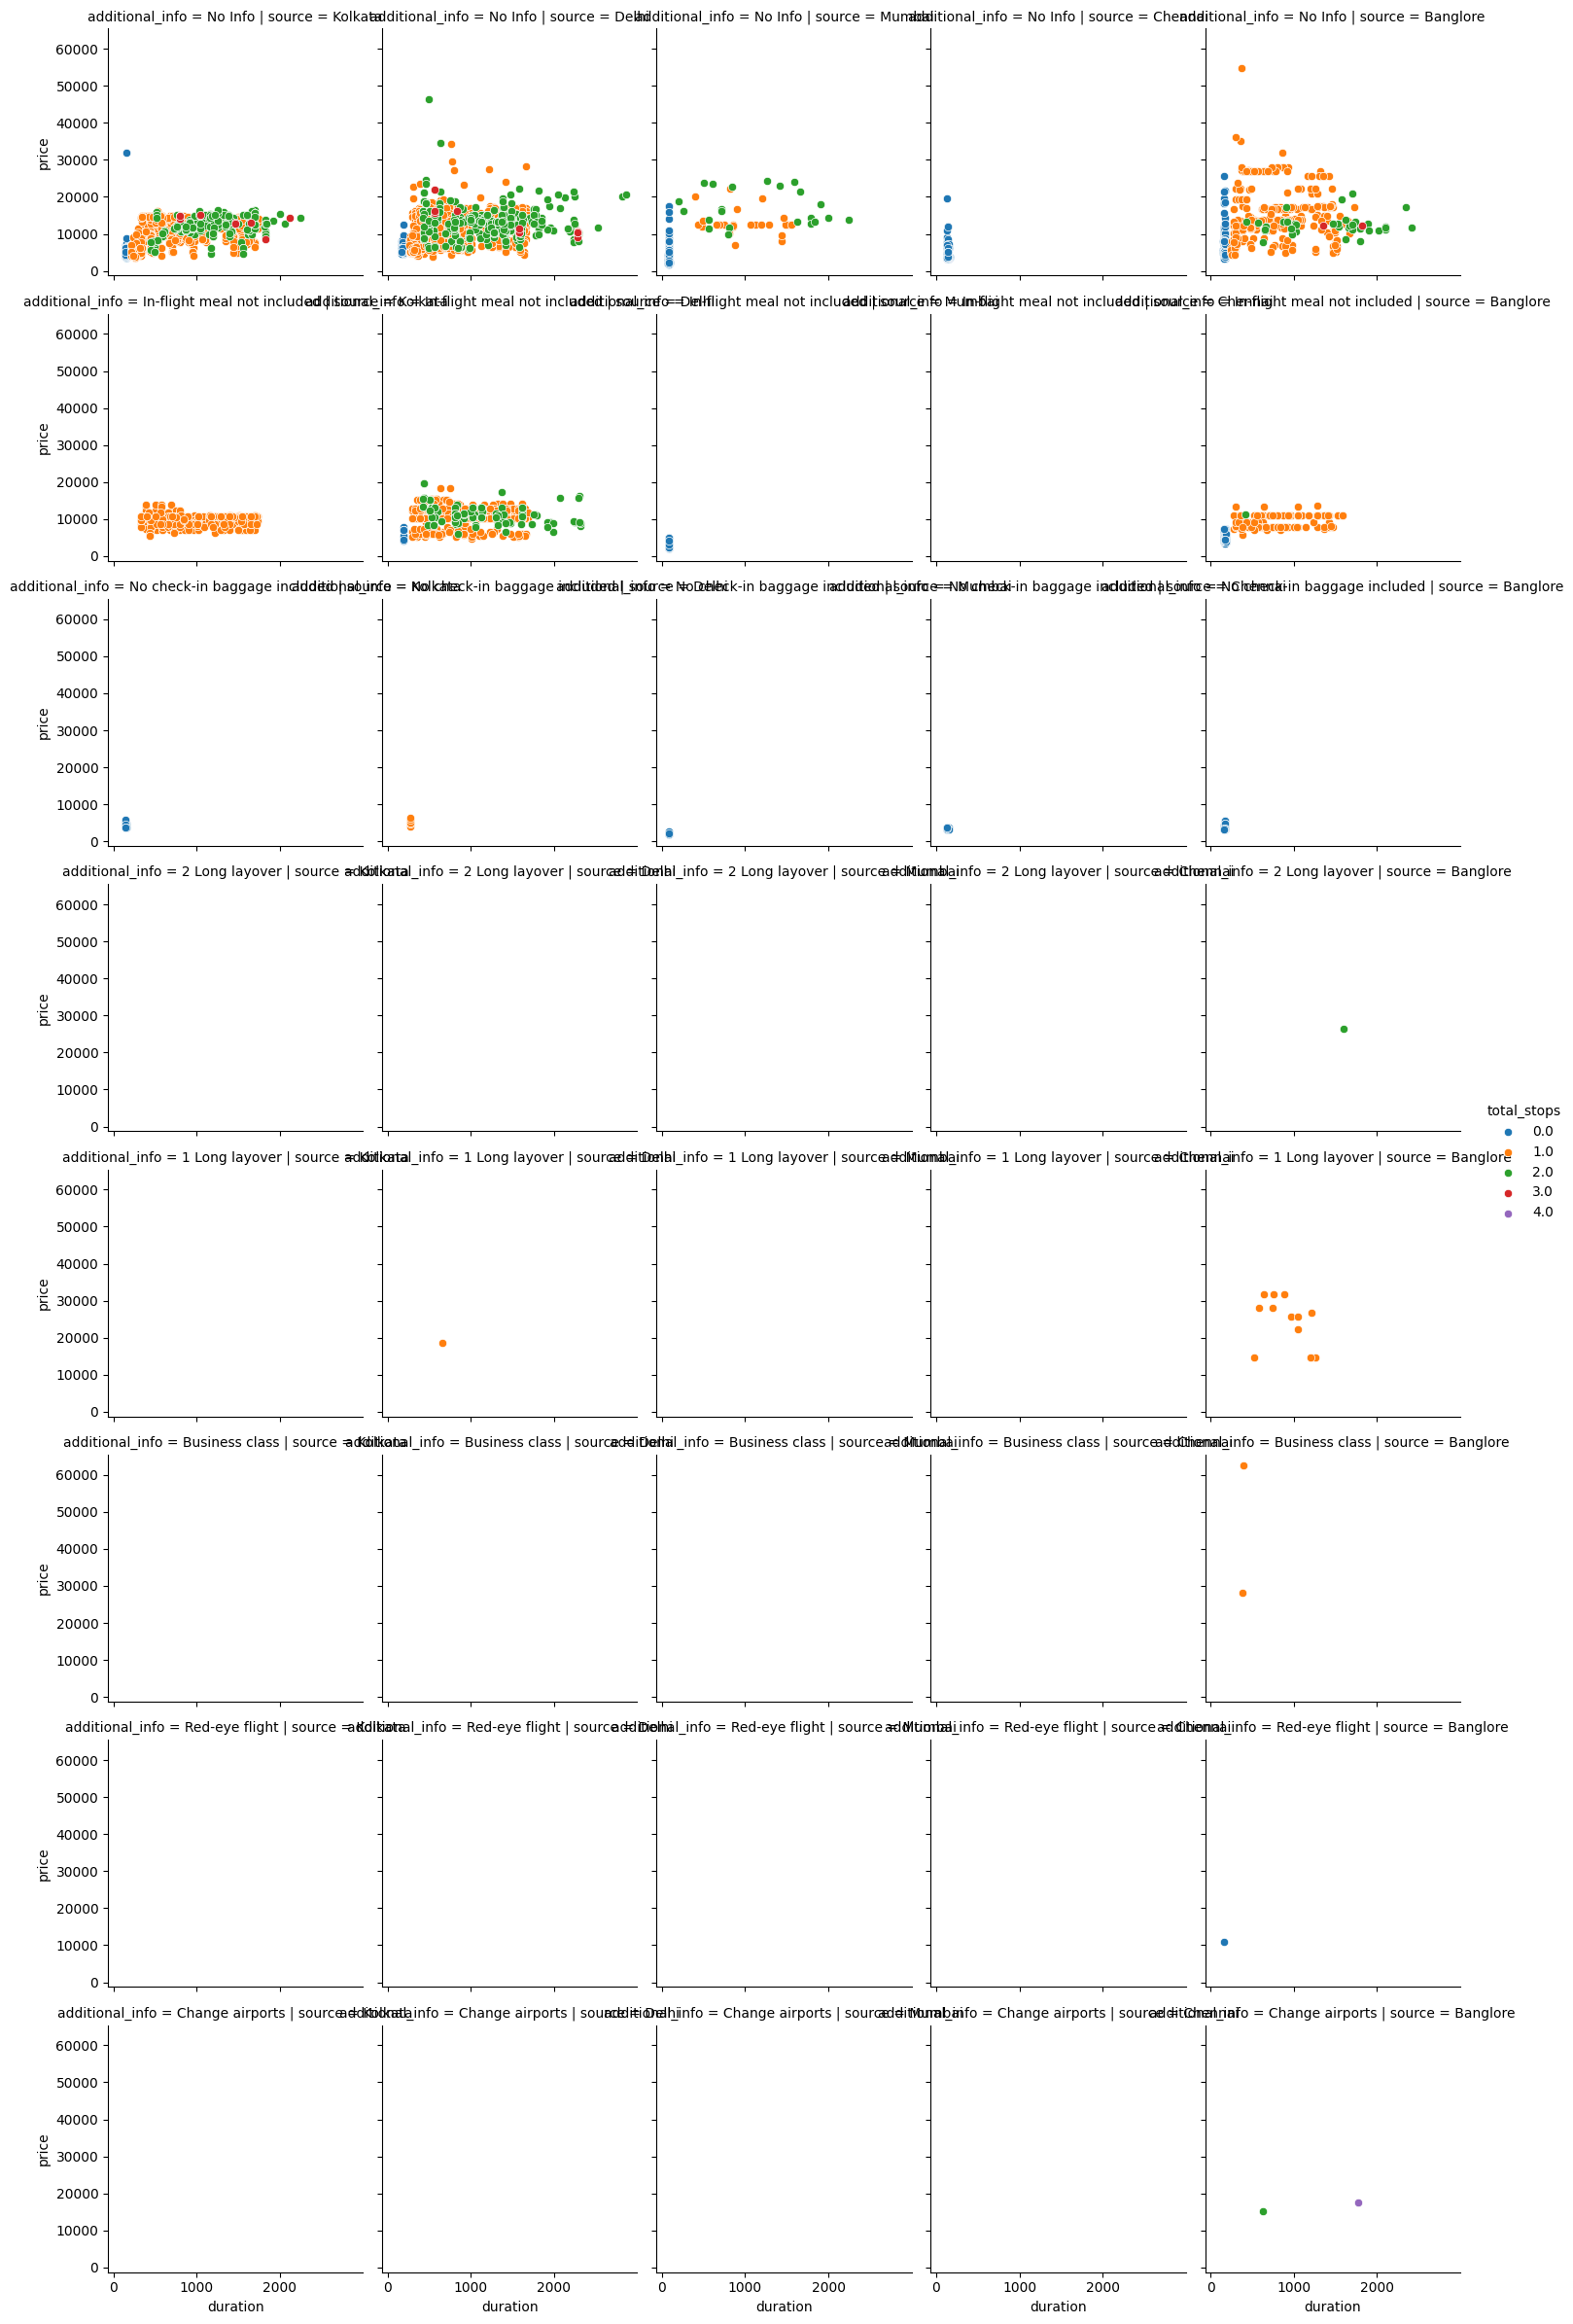

In [43]:
duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    row="additional_info",  # Adding another feature to make it 5-dimensional
    hue="total_stops",
    sharey=True  # We are comparing duration vs price for every combination of categories, so we want to make sure that the y-axis is constant for every plot.
)

duration_grid.map(sns.scatterplot, "duration", "price") 
duration_grid.add_legend()


## Observation

- In each source, we have a scatter plot for duration and price.
- If we observe the plots:
  - For the source "Mumbai," most flights have a duration of less than 100 minutes, and prices go up to 20,000.
  - For the source "Chennai," all flights have a duration of less than 100 minutes, and prices also go up to 20,000.
- We also have flights with 0, 1, 2, and 3 stops. How can we include that in this graph? We already have duration, price, and source. We will add one more dimension, i.e., one more column, by using `hue="total_stops"`.
- Now, for each source, for duration and price, we are separating those flights based on the number of stops (0, 1, ... stops).
  - All direct flights are blue in color, orange for 1 stop, and so on.
  - If we see for Chennai, all flights have 1 stop.
  - Even for all sources, the flights with lower duration are all direct flights.
- By adding the colors, we can learn many more things from the data.
- This is a 4-dimensional plot where we are analyzing 4 variables just by using one function, `FacetGrid`.


In [44]:
eda_helper_functions.get_iqr_outliers(train, "duration").head()


Lower Limit : -962.5
Upper Limit : 2057.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
430,Air India,2019-05-15,Kolkata,Banglore,2024-07-08 05:50:00,2024-07-08 16:15:00,2065,2.0,No Info,12723
5170,Jet Airways,2019-03-06,Delhi,Cochin,2024-07-08 17:55:00,2024-07-08 04:25:00,2070,2.0,No Info,17072
4490,Jet Airways,2019-03-06,Delhi,Cochin,2024-07-08 17:55:00,2024-07-08 04:25:00,2070,2.0,In-flight meal not included,15812
4744,Air India,2019-03-03,Banglore,New Delhi,2024-07-08 11:05:00,2024-07-08 22:10:00,2105,2.0,No Info,11791
581,Air India,2019-03-03,Banglore,New Delhi,2024-07-08 11:05:00,2024-07-08 22:10:00,2105,2.0,No Info,11948


#### Why is This Code Done?

The code is designed to identify outliers in a given dataset based on the IQR method. Outliers can significantly affect statistical analyses and machine learning models. By identifying and understanding outliers, we can decide whether to remove them, transform them, or keep them based on their impact on the analysis.

#### How This Output Helps Us

- **Identify Anomalies**: By identifying outliers, we can detect unusual flights with extremely long durations. These might be errors, special cases, or valid entries that need special attention.
- **Improve Analysis**: Knowing the outliers allows us to make informed decisions on how to handle them, which can improve the quality of our statistical analyses and machine learning models.
- **Data Cleaning**: We can choose to remove or transform these outliers to prevent them from skewing the results.
- **Insights**: Analyzing outliers might provide additional insights into specific conditions or scenarios that cause these extreme values.

Understanding and handling outliers is a crucial step in data preprocessing, ensuring that the data used for analysis is accurate and reliable.


### 8.5 additional_info

In [45]:
eda_helper_functions.cat_summary(train, "additional_info")


0                           No Info
1                           No Info
2       In-flight meal not included
3                           No Info
4                           No Info
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                        No Info
Name: additional_info, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,8
top,No Info
freq,5222


,count,percentage
category,,
No Info,5222,0.779985
In-flight meal not included,1247,0.186258
No check-in baggage included,207,0.030919
1 Long layover,13,0.001942
Business class,2,0.000299
Change airports,2,0.000299
2 Long layover,1,0.000149
Red-eye flight,1,0.000149


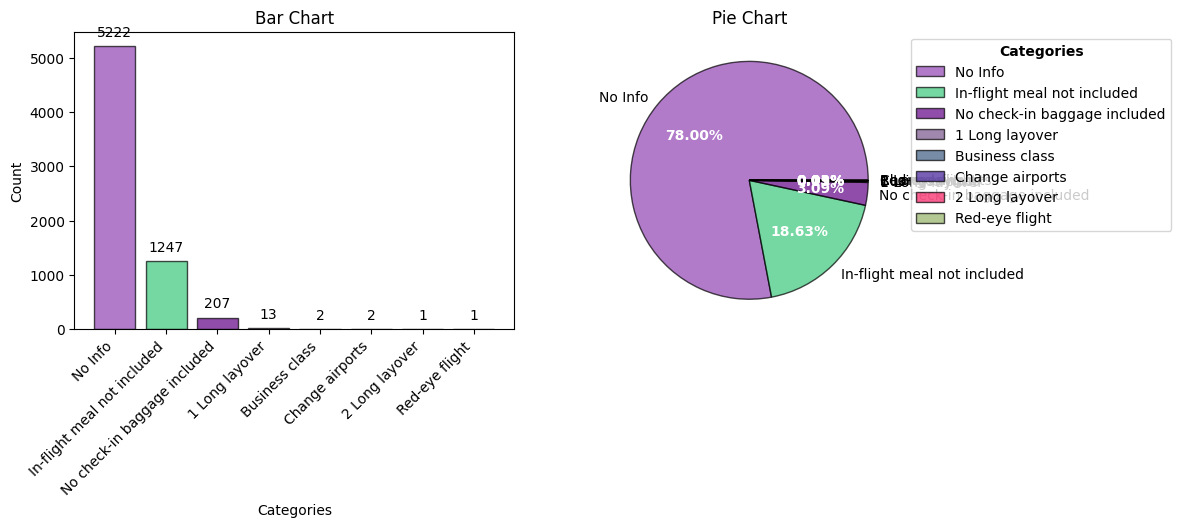

In [46]:
eda_helper_functions.cat_univar_plots(train, "additional_info", show_wordcloud=False)


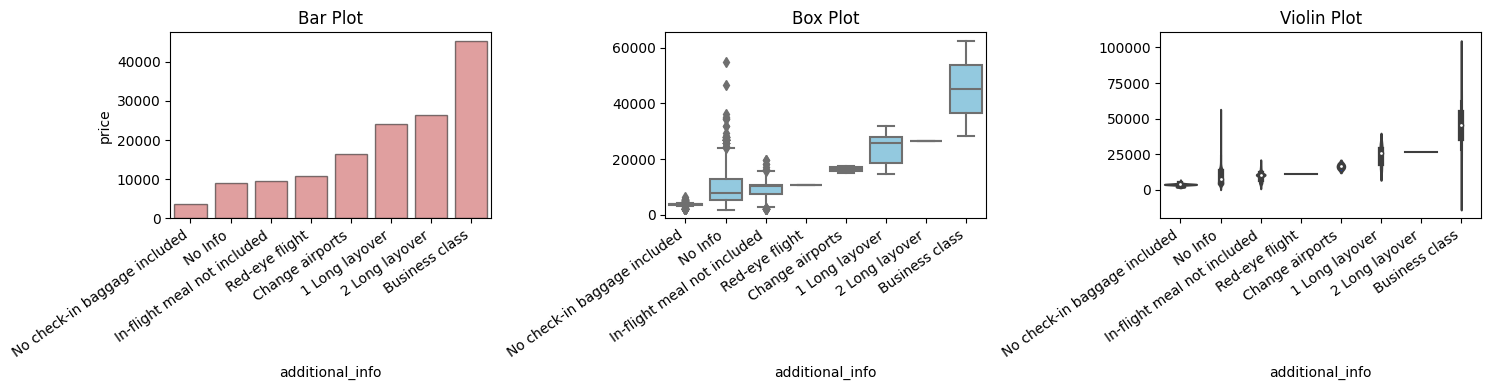

In [47]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")


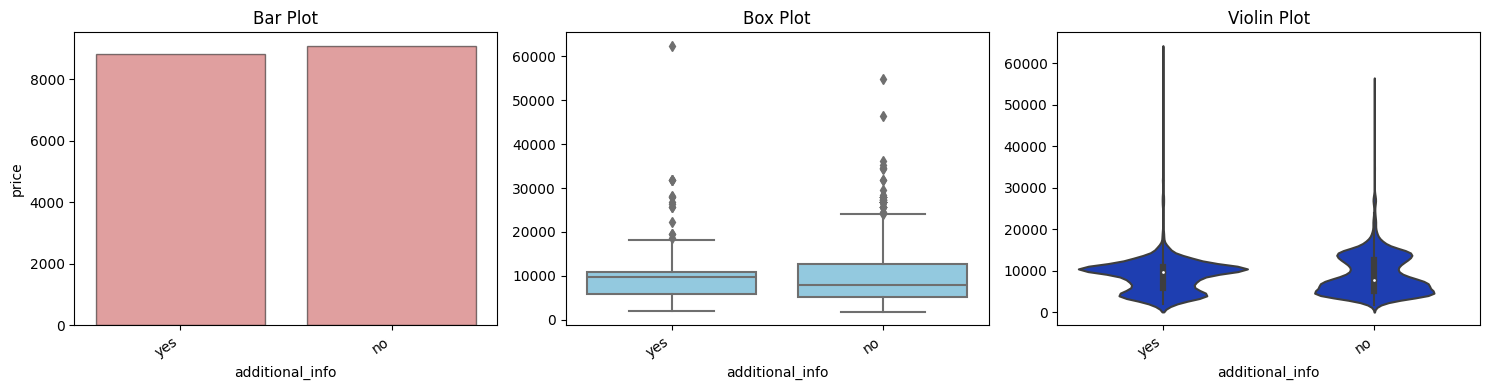

In [48]:
# convertion additional_info into a binary feature for analysis

(
    train
    .assign(additional_info=(
        train
        .additional_info
        .pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

### 9. Automated EDA

If we have hundreds of columns, automated EDA tools can be very helpful. Here are some libraries that facilitate automated EDA:

1. pandas profiling (`ydata-profiling`)
2. Sweetviz
3. Autoviz
4. D-Tale

For this task, we will use pandas profiling (`ydata-profiling`).


In [49]:
#!python -m pip install --upgrade pip


In [50]:
#!pip install ydata-profiling --quiet --no-cache-dir


In [51]:
#conda install -c conda-forge ydata-profiling


In [52]:
from ydata_profiling import ProfileReport


In [53]:
# whatever we manually did above most of it will be there in the report

airline_report = ProfileReport(train)

In [54]:
#airline_report

In [55]:
airline_report.to_file(r"../notebooks/airline_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]